# <center>Визуализация данных PRO<center>

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np #установите данную библиотеку

In [227]:
# global settings

sns.set_theme(style="darkgrid")

**1. Постройте heatmap, отображающий среднедневные продажи на разных страницах сайта в зависимости от времени и типа устройства пользователя по имеющимся данным.** 

,Websites,Time,Devices,Sales
0,Blog,Morning,Desktop,80.0
1,Blog,Morning,Mobile,70.0
2,Blog,Morning,Tablet,96.0
3,Blog,Noon,Other,83.0
4,Main,Morning,Desktop,77.0


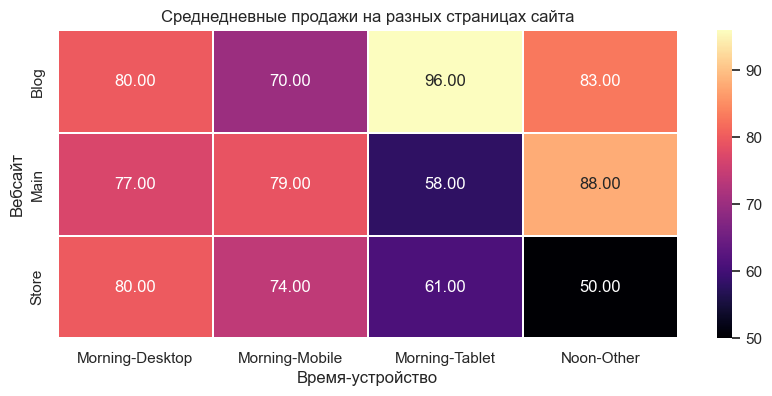

In [228]:
websites = ['Main', 'Main', 'Main', 'Main', 'Blog', 'Blog',
            'Blog', 'Blog', 'Store', 'Store', 'Store', 'Store']
devices = ['Desktop', 'Mobile', 'Tablet', 'Other', 'Desktop',
           'Mobile', 'Tablet', 'Other', 'Desktop', 'Mobile', 'Tablet', 'Other']
sales = np.random.randint(50, 100, size=12)
time = ['Morning', 'Morning', 'Morning', 'Noon', 'Morning', 'Morning',
        'Morning', 'Noon', 'Morning', 'Morning', 'Morning', 'Noon']

df = pd.DataFrame({'Websites': websites, 'Devices': devices, 'Sales': sales, 'Time': time})


np.random.seed(42) # Зафиксирую рандомные значения , сбивает с толку.
                   # Не мог понять почему продажи разные , потом увидел , что они рандомно генерируются

mean_sales = df.groupby(['Websites', 'Time', 'Devices'])['Sales'].mean().reset_index()
display(mean_sales.head())

f, ax = plt.subplots(figsize=(10, 4))
sales = mean_sales.pivot(index='Websites', columns=['Time', 'Devices'], values='Sales')
sns.heatmap(sales,
            annot=True,
            fmt=".2f",
            linewidths=0.2,
            ax=ax,
            vmin=mean_sales['Sales'].min(),
            vmax=mean_sales['Sales'].max(),
            cmap='magma')

plt.xlabel('Время-устройство')
plt.ylabel('Вебсайт')
plt.title('Среднедневные продажи на разных страницах сайта')
plt.show()

**2. Постройте столбчатую диаграмму расходов на еду, жилье, транспорт, развлечения и другие категории за один месяц. Для каждой категории необходимо отобразить средний расход и общее количество потраченных денег.**

,Category,Mean,Total,last_month
0,Food,5000,150000,6000.0
1,Housing,20000,400000,24000.0
2,Transportation,3000,90000,9000.0
3,Entertainment,2500,50000,3000.0
4,Other,1000,10000,1200.0


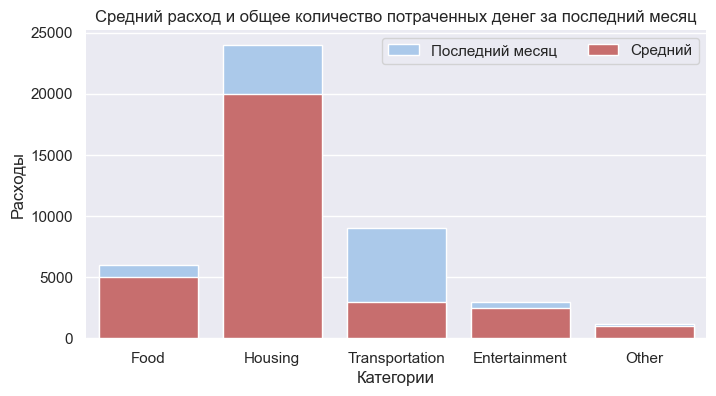

In [229]:
expenses = pd.DataFrame({
    'Category': ['Food', 'Housing', 'Transportation', 'Entertainment', 'Other'],
    'Mean': [5000, 20000, 3000, 2500, 1000],
    'Total': [150000, 400000, 90000, 50000, 10000]
})

# Что значит за один месяц ?
# Ну как вас понимать ?
# Данные данны за один месяц ? Ну откуда мне это все знать ?

# Я могу только предположить что Total - Это за 12 месяцев , а Mean - это средняя за 12 месяцев
# Моя логика тогда такая. Я предположу что за один(Возьму последний) человек потратил на еду больше среднего на 20%
expenses['last_month'] = expenses['Mean'] * 1.2

# В последний месяц на развлечения ушло в три раза больше среднего(загулял)
expenses.loc[expenses['Category'] == 'Transportation', 'last_month'] = expenses['Mean'] * 3

display(expenses)


f, ax = plt.subplots(figsize=(8, 4))

sns.set_color_codes("pastel")
sns.barplot(x='Category', y='last_month', data=expenses,
            label='Последний месяц', color="b")

sns.set_color_codes("muted")
sns.barplot(x='Category', y='Mean', data=expenses,
            label='Средний', color="r")


ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(-0.5, 4.5), xlabel='Категории', ylabel="Расходы")
sns.despine(f, left=True, bottom=True)

plt.title('Cредний расход и общее количество потраченных денег за последний месяц')
plt.show()

**3. Вам предоставлены данные о доходах клиентов банка по разным категориям дохода. Ваша задача - построить boxplot для каждой категории дохода и определить, есть ли выбросы в данных, а также вывести их списком на экран. Для работы с выбросами рекомендую воспользоваться методом `quantile()`.**

,Category 1,Category 2,Category 3
0,54967.141530,100990.331549,103120.543126
1,48617.356988,93869.505244,116387.033232
2,56476.885381,80894.455549,100189.501975


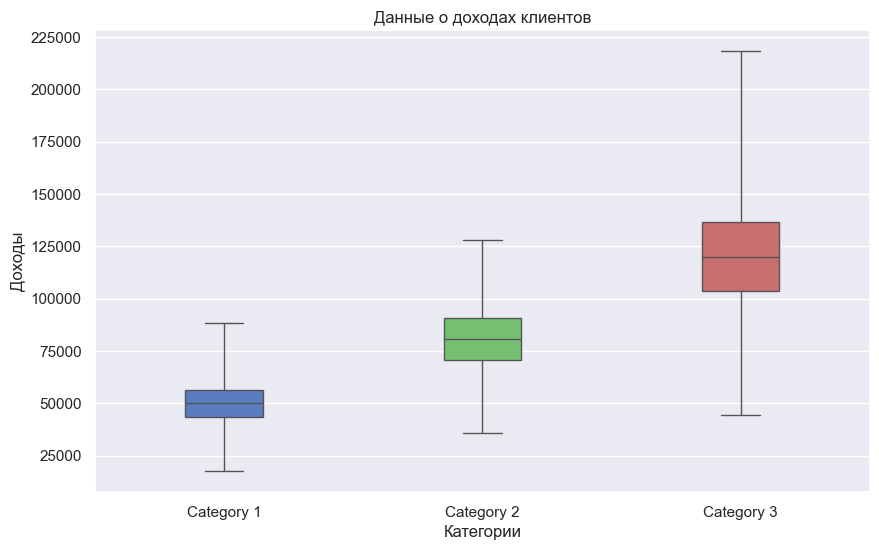

Список id-пользователей с выбросами по зарплате:
[209, 262, 13, 37, 74, 79, 110, 236, 262, 285, 382, 431, 442, 471, 544, 566, 575, 646, 668, 671, 708, 933, 975, 977, 991, 13, 14, 19, 23, 37, 38, 44, 49, 74, 79, 95, 100, 110, 123, 130, 142, 147, 189, 204, 221, 223, 236, 254, 262, 267, 271, 285, 346, 347, 382, 392, 396, 400, 412, 429, 431, 437, 438, 442, 444, 471, 472, 482, 485, 499, 502, 520, 525, 526, 531, 544, 566, 568, 575, 578, 608, 630, 635, 638, 639, 643, 646, 668, 671, 674, 703, 704, 706, 708, 721, 722, 733, 740, 741, 749, 751, 775, 781, 789, 793, 815, 830, 861, 872, 906, 925, 932, 933, 940, 946, 969, 975, 977, 978, 991]


In [230]:
# генерируем случайные данные о доходах клиентов банка
np.random.seed(42)
data = pd.DataFrame({
    'Category 1': np.random.normal(50000, 10000, 1000),
    'Category 2': np.random.normal(80000, 15000, 1000),
    'Category 3': np.random.normal(120000, 25000, 1000)
})

display(data.head(3))


plt.figure(figsize=(10, 6))

sns.boxplot(data=data,
            whis=[0, 100],
            width=0.3,
            palette=["b", "g", "r"])

plt.title('Данные о доходах клиентов')
plt.xlabel('Категории')
plt.ylabel('Доходы')
plt.show()


def search_outliers():
    '''Поиск выбросов'''

    result = []
    for i in data.columns:
        quantile_20 = data[i].quantile(0.20)
        quantile_80 = data[i].quantile(0.80)
        difference = quantile_80 - quantile_20
        lower_outliers = quantile_20 - 1.5 * difference
        upper_outliers = quantile_80 + 1.5 * difference
        result.extend(data[i][(data['Category 1'] < lower_outliers) | (data['Category 1'] > upper_outliers)].index.values)
    return result


print(f"Список id-пользователей с выбросами по зарплате:\n{search_outliers()}")
